# The frequency of terrorist attacks substantially decreased lately

We will work with a dataset that provides information about all terrorist attacks between 1970 and 2017 (With the exception of 1993, but that doesn't matter much for this). We will analyse three measurements: The number of terrorist attacks, the number of people killed by them and the number of people wounded by them.
First we will find out how those measurements developed per year since 1970.
Then we will see how the number of people killed, respectively wounded correlate to the number of terrorist attacks per year.
Then we will see how the values of the three measurements are distributed - using pie plots and histograms with kernel density plots.
Finally we will go back to the first question - how the three measurements developed since 1970. But instead of looking at them at the global level we'll compare the three worst regions when it comes to terrorism of the last years and the rest of the world.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
sns.set_palette('colorblind')

In [12]:
terrorism = pd.read_excel('globalterrorismdb_0718dist.xlsx')

In [13]:
terrorism.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [14]:
terrorism.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaT,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaT,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaT,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaT,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaT,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [15]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(55), int64(22), object(57)
memory usage: 187.1+ MB


In [16]:
counted = terrorism['iyear'].value_counts().sort_index()

In [17]:
def line_plot(data, title, datatype='Series', labels=None):
    plt.figure(figsize=(12,8))
    if datatype == 'df':
        for col, label in zip(data.columns, labels):
            sns.lineplot(data.index, data[col], label=label)
        plt.legend()
    elif datatype == 'Series':
        sns.lineplot(data.index, data)
    sns.despine(left=True,bottom=True)
    plt.title(title, size=20)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(np.arange(1970,2021, 10))

### Number of terrorist attacks per year
Below we can see how the number of terrorist attacks worldwide per year developed over time. We can see the following broad developments:
* Since the seventies terrorist attacks increased in numbers until the beginning of the 90ies.
* From the beginning till the end of the nineties they decreased
* From the middle of the 00 years until 2014 they increased substantially
* From 2014 until 2017 (The last year documented) they decreased substantially

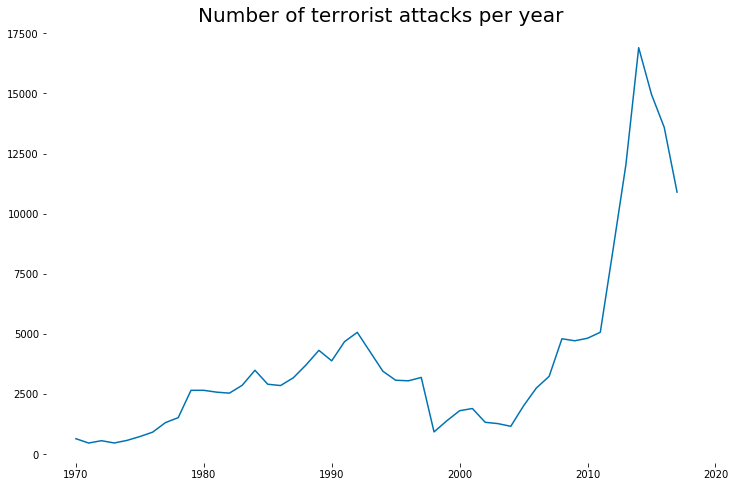

In [18]:
line_plot(counted, 'Number of terrorist attacks per year')

In [19]:
kill_wound_year = terrorism.pivot_table(index='iyear', values=['nwound','nkill'], aggfunc=sum)

### Number of people killed/wounded per year
Below we can see how the number of people killed and of people wounded by terrorist attacks per year developed over time. We can for example draw the following conclusions:
* The development was similar to that of the development of the number of attacks from above
* The last few years, both measurements dropped substantially
* In many years, more people have been killed than wounded

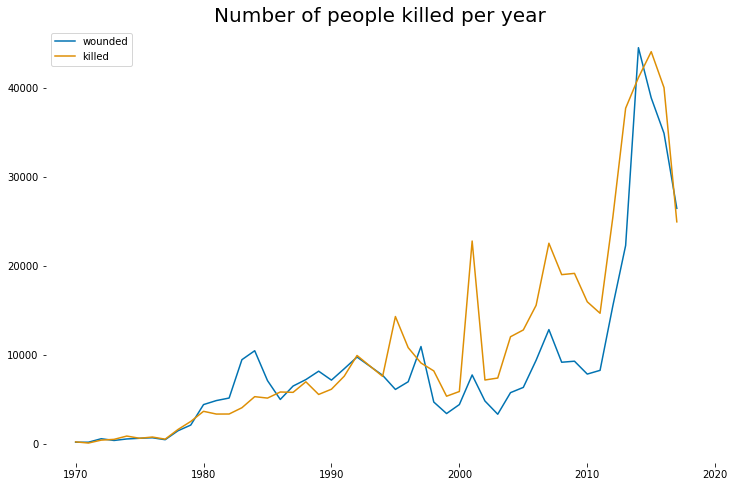

In [20]:
line_plot(kill_wound_year, 'Number of people killed per year','df',['wounded','killed'])

In [21]:
def scatter_plot(xdata, ydata, title, xlabel, ylabel,):
    plt.figure(figsize=(10,10))
    sns.scatterplot(xdata, ydata)
    sns.despine(left=True,bottom=True)
    plt.title(title, size=20)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### Correlation between the number of attacks per year and people killed/wounded per year
Below we can see the correlation between the number of attacks per year and the number of people wounded/killed per year. Each point is a year. We can for example draw the following conclusions out of the plots below:
* As expected, the number of terrorist attacks per year positively correlates with both the number of people killed and people wounded by terrorist attacks per year
* It is not a perfect correlation, The attacks of some years appear to have been significantly more lethal respectively caused more wounded people in average than others.
* The correlation of the number of people wounded per year with the number of incidents per year is weaker than that of the number of people killed per year with the number of incidents per year.


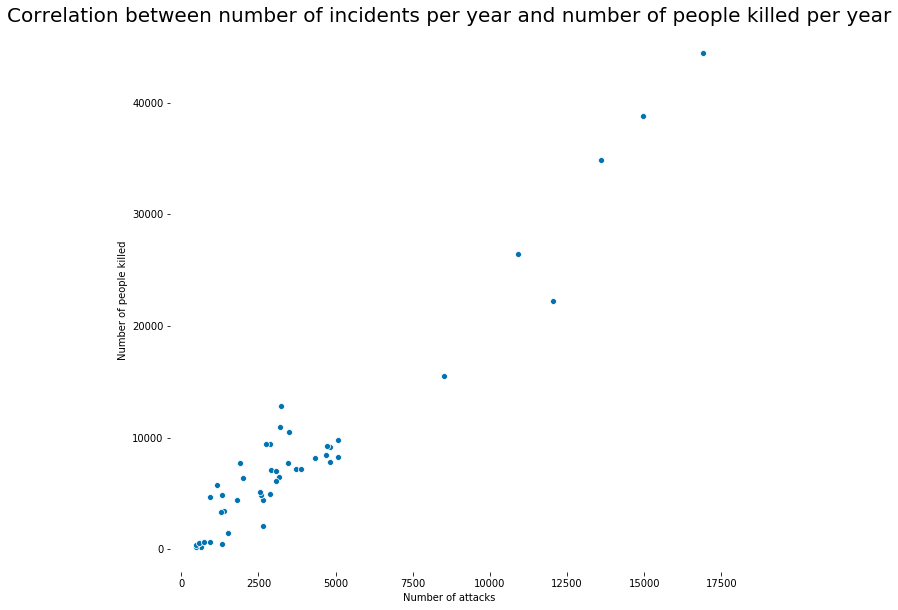

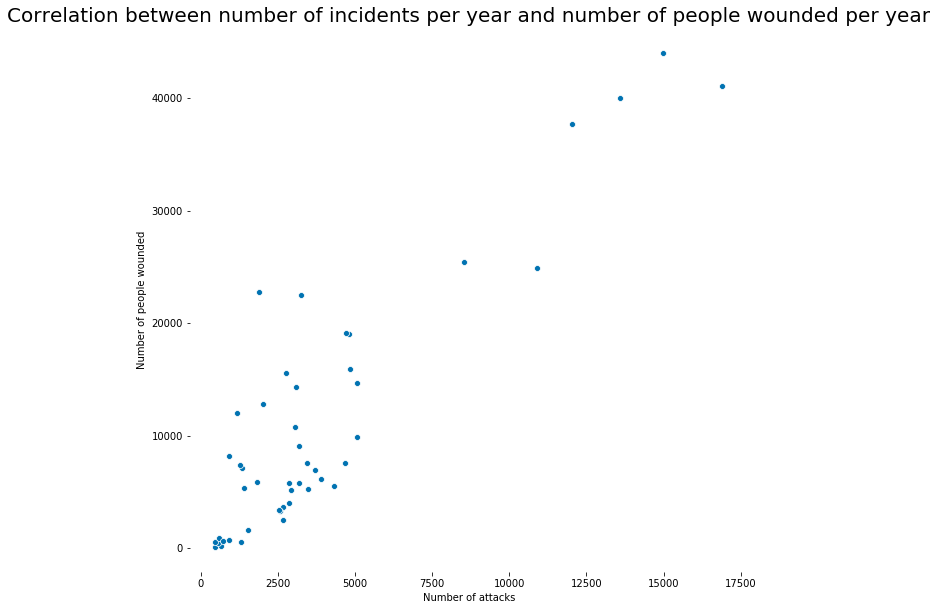

In [22]:
scatter_plot(counted, kill_wound_year['nkill'],\
             'Correlation between number of incidents per year and number of people killed per year',\
            'Number of attacks', 'Number of people killed')
scatter_plot(counted, kill_wound_year['nwound'],\
             'Correlation between number of incidents per year and number of people wounded per year',\
            'Number of attacks', 'Number of people wounded')

In [23]:
def pie(data, title, labels):
    plt.figure(figsize=(12,8))
    a, labels, c = plt.pie(data, labels=labels, autopct='%1.1f%%')
    labels[1].set_fontsize(15)
    labels[0].set_fontsize(15)
    sns.despine(left=True,bottom=True)
    ttl = plt.title(title, size=20)
    ttl.set_position([.5, 1.05])
    plt.ylabel('')
    plt.xlabel('')
    plt.axis('equal')
    plt.tight_layout()

In [29]:
none_killed = len(terrorism[terrorism['nkill'] == 0])/len(terrorism)

### Lethal attacks vs. non-lethal attacks
Now let's look at how lethal terrorist attacks were. The following plot shows the proportion of attacks which caused no fatalities at all compared to those that caused at least one fatality. We can draw the following conclusion out of it:
* Almost half of all attacks lead to no fatality at all

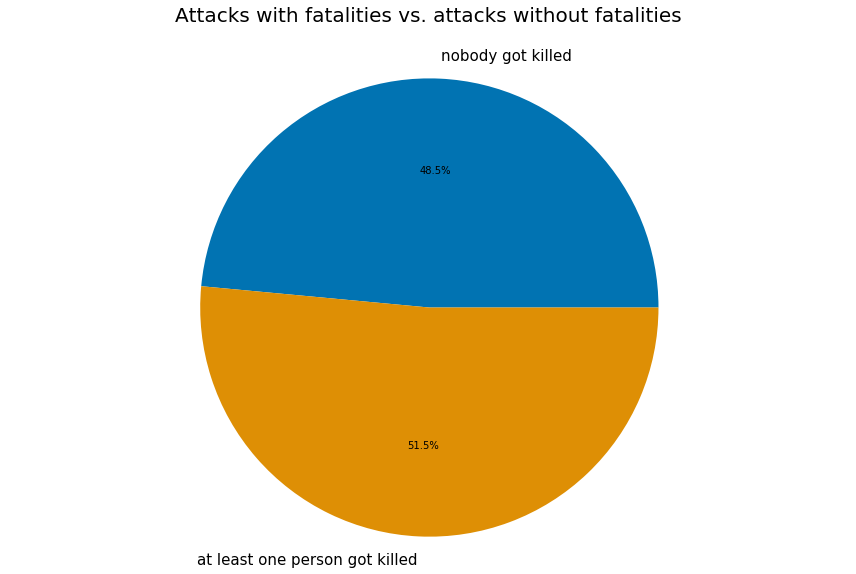

In [36]:
pie((none_killed, 1-none_killed), 'Attacks with fatalities vs. attacks without fatalities',['nobody got killed', 'at least one person got killed'])

In [32]:
non_wounded = len(terrorism[(terrorism['nwound'] == 0)])/len(terrorism)

### Attacks that caused wounded people vs. attacks that didn't cause wounded people
Now let's look at the number of wounded people terrorist attacks caused. The following plot shows the proportion of attacks which didn't lead to any wounded people compared to the number of those that lead to at least one wounded person. We can draw the following conclusion out of it:
* More than half of all attacks didn't leave anybody wounded

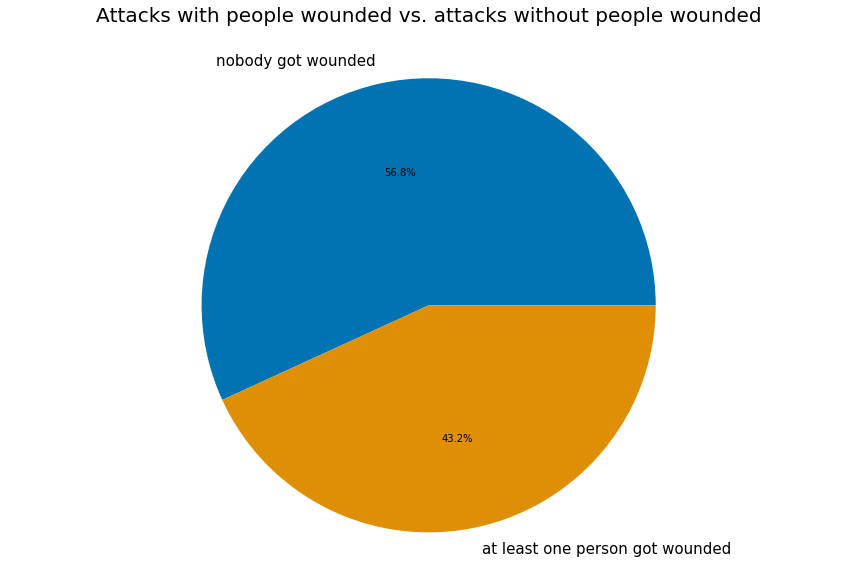

In [35]:
pie((non_wounded,1-non_wounded), 'Attacks with people wounded vs. attacks without people wounded',['nobody got wounded', 'at least one person got wounded'])

In [38]:
no_casualties =len(terrorism[(terrorism['nkill'] == 0) & (terrorism['nwound'] == 0)])/len(terrorism)

### Attacks that caused casualties vs. those that didn't
A casualty is a person that gets either killed or wounded by an event (the union of people killed and people wounded). The plot below compares the number of terrorist attacks that caused casualties with those that didn't. We can draw the following conclusion out of it:
* About 35 percent of all terrorist attacks didn't lead to any casualties

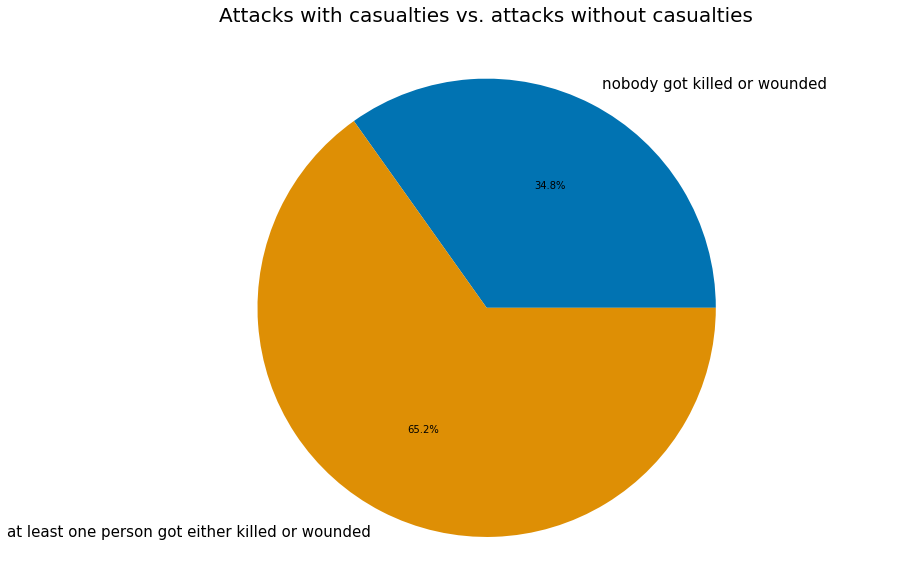

In [40]:
pie((no_casualties,1-no_casualties), 'Attacks with casualties vs. attacks without casualties',['nobody got killed or wounded', 'at least one person got either killed or wounded'])

In [41]:
def histogram(data, title, bins, upper_xlim):
    plt.figure(figsize=(12,8))
    sns.distplot(data.dropna(), bins=bins, norm_hist=True)
    sns.despine(left=True,bottom=True)
    plt.title(title, size=20)


In [42]:
def upper_outlier_border(colname):
    return round(terrorism[colname].mean() + 2*terrorism[colname].std())

### Distribution of people killed per terrorist attack 
The histogram below shows the distribution of people killed per attack. Only attacks that caused at least one dead person but are not outliers (more than two standard deviations from the mean) are into account. Each bin represents one person. We can draw the following conclusion:
* The proportion of attacks that caused one death is biggest (among the attacks that don't fall into the exceptions described above)
* For each further attack, the proportion sinks


/home/florian/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Proportion of attacks')

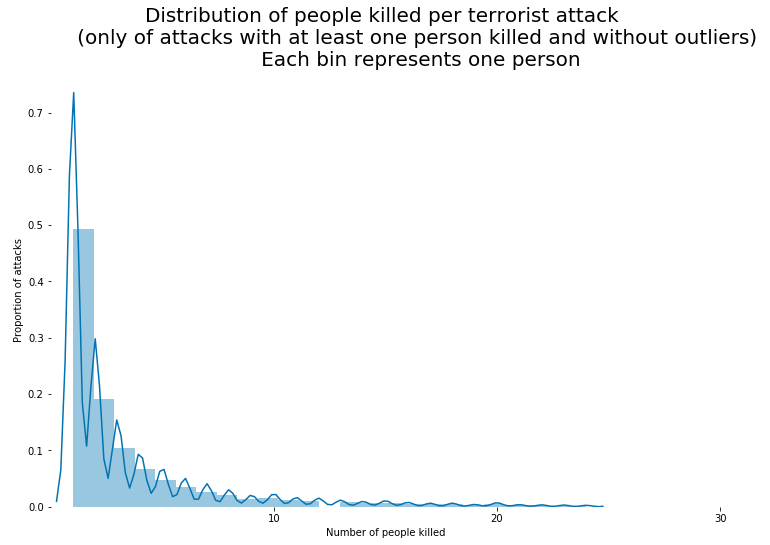

In [44]:
histogram(terrorism[(terrorism['nkill'] != 0) & (terrorism['nkill'] < upper_outlier_border('nkill'))]['nkill'], \
          'Distribution of people killed per terrorist attack \n \
          (only of attacks with at least one person killed and without outliers) \n \
          Each bin represents one person', \
          upper_outlier_border('nkill'), upper_outlier_border('nkill'))
plt.xticks(range(10,31,10)) 
plt.xlim((0,30))
plt.xlabel('Number of people killed')
plt.ylabel('Proportion of attacks')

### Distribution of people wounded per terrorist attack 
The histogram below shows the distribution of people wounded per attack. Only attacks that caused at least one wounded person but are not outliers (more than two standard deviations from the mean) are into account. Each bin represents one person. We can draw the following conclusion:
* The proportion of attacks that caused one wounded person is biggest (among the attacks that don't fall into the exceptions described above)
* For each further attack, the proportion sinks


/home/florian/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Proportion of attacks')

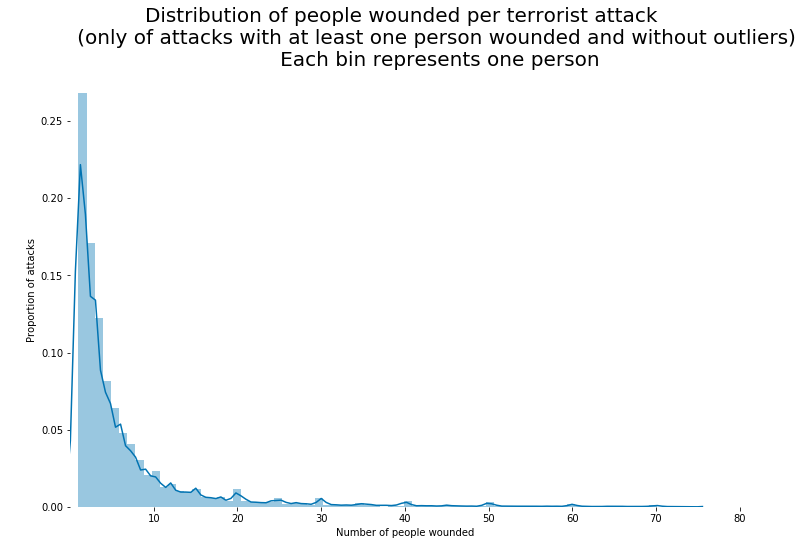

In [46]:
histogram(terrorism[(terrorism['nwound'] != 0) & (terrorism['nwound'] < upper_outlier_border('nwound'))]['nwound'], \
          'Distribution of people wounded per terrorist attack \n \
          (only of attacks with at least one person wounded and without outliers) \n \
          Each bin represents one person', \
          75, upper_outlier_border('nwound'))
plt.xticks(range(10,81,10)) 
plt.xlim((0,80))
plt.xlabel('Number of people wounded')
plt.ylabel('Proportion of attacks')

In [47]:
not_top_three = [x for x in terrorism['region_txt'].unique().tolist() \
                 if x not in ('South Asia', 'Middle East & North Africa', 'Sub-Saharan Africa')]

In [48]:
three_plus_rest = terrorism
three_plus_rest['region_txt'] = three_plus_rest['region_txt'].replace(not_top_three, 'Rest of the world')

In [50]:
three_wounded = three_plus_rest.pivot_table(index='iyear', values='nwound', columns='region_txt', aggfunc=sum).fillna(0)
three_killed = three_plus_rest.pivot_table(index='iyear', values='nkill', columns='region_txt', aggfunc=sum).fillna(0)
three_plus_rest['count'] = 1

three_number = three_plus_rest.pivot_table(index='iyear', values='count', columns='region_txt', aggfunc=sum)

### The development of the three dominant regions in terrorism compared to the rest of the world over time
Now we come back to the subjects we started with at the first time - the development of the number of attacks, number of people killed and number of people wounded per year over time. This time we look at the regions that experienced most attacks the last years (I found out by doing Exploratory Data Analysis before): The Middle East & North Africa, South Asia and Sub-Saharan Africa. We can for example draw the following concusions out of the plots below.
* All three regions have seen a strong increase in attacks, number of people killed from the middle of the 0 years until the middle of this decade
* They all strongly improved in all 3 measurements since the middle of this decade
* It's those three regions cause the new millenium to be worse in the three measurements than the three decades just before
* The rest of the world actually got better all in all - at least when it comes to the number of terrorist attacks and the number of people killed by them




## Conclusion
The following conclusions I found most interesting:
* The last few years it got clearly better if it comes to terrorism in all measurements - globally as well as when it comes to the three regions I analysed separately
* As expected, the number of persons killed/wounded per year correlates with the number of attacks that happened per year. But the correlation is not as strong as I personally would expect.
* About 35% of all terrorist attacks didn't lead to any casualties at all
* Generally, attacks that killed/wounded more people happened less often than attacks that killed less people
